In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


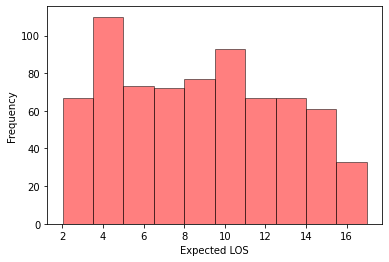

In [2]:
#16. Plot a graph to show the distribution of Expected Length of Stay
discharge = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df_LOS = discharge["ExpectedLOS"]
(df_LOS).head()
plt.hist(df_LOS,bins=10,color='red',alpha=0.5,edgecolor='black')
plt.xlabel('Expected LOS')
plt.ylabel('Frequency')
plt.show()

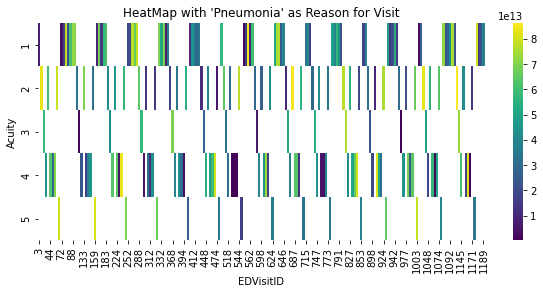

In [16]:
#17.a) Create a heat map to show the correlation between the column values of ED Visits.


edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculating the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Choosing the Reason for Visit as Pneumonia
ed =edm.loc[edm.ReasonForVisit == 'Pneumonia']

#plotting the heatmap
ed = ed.pivot("Acuity","EDVisitID","Timeinhosp")
plt.figure(figsize=(10,4))
plot=sns.heatmap(ed,cmap="viridis")
plt.title("HeatMap with 'Pneumonia' as Reason for Visit")
plt.show()

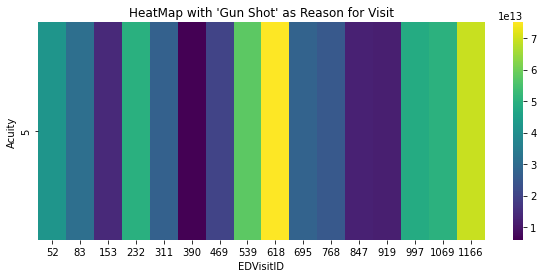

In [17]:
#17.b) Create a heat map to show the correlation between the column values of ED Visits.


edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculating the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Choosing the Reason for Visit as Gun Shot
ed =edm.loc[edm.ReasonForVisit == 'Gun Shot']

#plotting the heatmap
ed = ed.pivot("Acuity","EDVisitID","Timeinhosp")
plt.figure(figsize=(10,4))
plot=sns.heatmap(ed,cmap="viridis")
plt.title("HeatMap with 'Gun Shot' as Reason for Visit")
plt.show()

In [3]:
#18.Add column 'Age' in Patient table.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)
display(patient)
    

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [4]:
#19.Create a dataframe with date and time as columns,where the values are the discharge time from ReAdmission resistry sheet.

readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_dischargetime = readmregistry["DischargeDate"]

#Creating a dataFrame
df = pd.DataFrame(df_dischargetime)
#Splitting the date part 
df["Date"] = [readmregistry.date() for readmregistry in df["DischargeDate"]]
#splitting the time part
df["Time"] = [readmregistry.time() for readmregistry in df["DischargeDate"]]
#Display the dataframe
display(df)

,DischargeDate,Date,Time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


In [19]:
#20. Count of number of patients admitted based on Primary Diagnosis and Service provided
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","Service","PatientID"]]
df_sort = df_readm.groupby(["PrimaryDiagnosis","Service"]).count()
(df_sort)

PatientID
PrimaryDiagnosis   Service                    
AMI                Cardiology               40
                   Hospitalist               1
                   ICU                       5
                   Neurology                 2
Afib               Cardiology               10
                   ICU                       1
Broken Leg         Cardiology                3
                   General Medicine          3
                   Hospitalist               3
Diabetes           General Medicine         38
                   Hospitalist              26
Fever              General Medicine         13
                   Hospitalist               3
                   ICU                       3
Flu                Cardiology                2
                   General Medicine         54
                   Hospitalist              19
                   ICU                       3
                   Neurology                 2
Heart Failure      Cardiology               39
                   ICU                      33
                   Neurology                 6
Hip Fracture       Orthopeadics             23
Hypertension       General Medicine         35
                   Hospitalist               6
                   ICU                       4
                   Neurology                 5
Kidney Failure     Cardiology                1
                   General Medicine         12
                   Hospitalist               6
                   ICU                       1
Knee Replacement   Hospitalist               1
                   Orthopeadics             22
Laceration         General Medicine         21
                   Hospitalist               7
                   ICU                       1
Migraine           Neurology                12
Pain               Neurology                 7
Pneumonia          General Medicine         67
                   Hospitalist              28
                   ICU                      77
                   Neurology                 5
Spinal Cord Injury ICU                       2
Stroke             General Medicine         20
                   Hospitalist               1
                   ICU                      21
                   Neurology                26

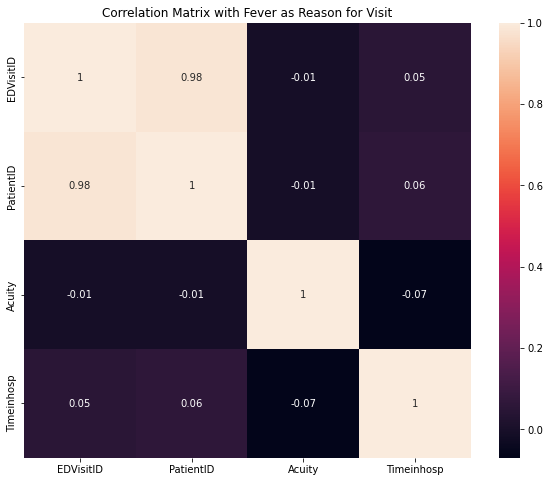

In [20]:
# 36.a) Create a correlation matrix on EDVisits

edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculting the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Correlation Matrix between the columns when the Reason for Visit is 'Fever'
ed =edm.loc[edm.ReasonForVisit == 'Fever']
corr = ed.corr()
corr


plt.figure(figsize=(10,8))
plot=sns.heatmap(ed.corr().round(2),annot = True)

plt.title("Correlation Matrix with Fever as Reason for Visit")
plt.show()




Text(0.5, 1.0, 'Correlation Matrix with ED Disposition is set to Discharged')

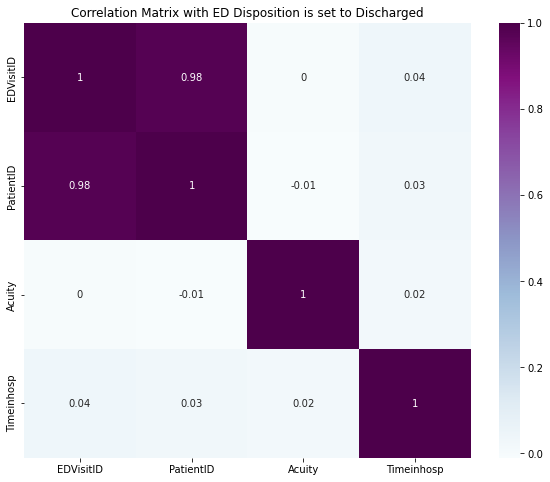

In [21]:
# 36.b) Create a correlation matrix on EDVisits

edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculting the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Correlation Matrix between the columns when the Ed Disposition is 'Discharged'
ed =edm.loc[edm.EDDisposition == 'Discharged']
corr = ed.corr()
corr


plt.figure(figsize=(10,8))
plot=sns.heatmap(ed.corr().round(2),annot = True,cmap='BuPu')

plt.title("Correlation Matrix with ED Disposition is set to Discharged")

In [1]:
#37. Write a function to print all the upper case letter of a given sentence.

def print_uppercase(sentence): 
    sent = list(filter(lambda c:c.isupper(),sentence))
    print("The uppercase characters in the string are : " + str(sent))
s = input("Please Enter a String:")
print("The entered string is : " + str(s))
print_uppercase(s)

Please Enter a String:What is Your Name?
The entered string is : What is Your Name?
The uppercase characters in the string are : ['W', 'Y', 'N']


In [9]:
#38. Number of patients on "Transfer" based on Primary Diagnosis.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_count = readmregistry.groupby("PrimaryDiagnosis")["DischargeDisposition"].apply(lambda x: (x=='Transfer').sum()).reset_index(name='Patientcount')
display(df_count)

,PrimaryDiagnosis,Patientcount
0,AMI,0
1,Afib,1
2,Broken Leg,0
3,Diabetes,7
4,Fever,0
5,Flu,2
6,Heart Failure,9
7,Hip Fracture,0
8,Hypertension,0
9,Kidney Failure,0


In [10]:
#39. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. 
#Use EDUnique Sheet for reason for visit.
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
edunique = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDUnique")
df_combined_file = patient[["PatientID","FirstName","LastName","DateOfBirth"]].merge(edunique[["PatientID","ReasonForVisit"]],
                                                   on = "PatientID",
                                                   how = "inner")
display(df_combined_file.query('ReasonForVisit=="Migraine"'))

,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
1,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
896,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


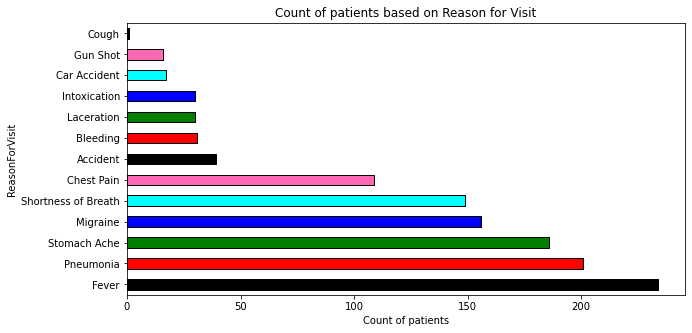

In [22]:
# 40. Plot a graph showing the count of patients for the reason visited the hospital.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
fig = plt.figure(figsize = (10, 5))
x=edvisit["ReasonForVisit"]
y=edvisit["ReasonForVisit"].value_counts().plot(kind='barh',color=['black', 'red', 'green', 'blue', 'cyan','hotpink'],
                                                edgecolor='black')
plt.title("Count of patients based on Reason for Visit")
plt.xlabel("Count of patients")
plt.ylabel("ReasonForVisit")
plt.show()


In [5]:
# 56. Count of Cancelled status.
df_ambulatory = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df_amb = df_ambulatory["VisitStatus"]
print((df_amb == 'Canceled').sum())

60


In [23]:
#57. Find the age prone to get stroke.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)


readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_merge = patient[["PatientID","Age"]].merge(readmregistry[["PatientID","PrimaryDiagnosis"]],
                                                   on = "PatientID",
                                                   how = "inner")
patlist = df_merge.groupby("Age")["PrimaryDiagnosis"].apply(lambda x: (x=='Stroke').sum()).nlargest(3).reset_index(name='Patientcount')
  
display(patlist)


,Age,Patientcount
0,54,5
1,57,5
2,61,5


In [25]:
#58.Display total count of patients service wise based on gender.
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_combined = patient[["PatientID","Gender"]].merge(readmregistry[["PatientID","Service"]],
                                                   on = "PatientID",
                                                   how = "inner")
patientcount = df_combined.groupby(["Service","Gender"]).count()
  
display(patientcount)

PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23

In [24]:
#59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
split_name =provider["ProviderName"].str.split()

#Creating a dataframe
df_name = pd.DataFrame(split_name)

#Splitting the first and last names
df_name["FirstName"] = split_name.str[0] 
df_name["LastName"] = split_name.str[-1] 

#Displaying the dataframe
display(df_name)


,ProviderName,FirstName,LastName
0,"[Sally, Sue]",Sally,Sue
1,"[Mike, Myers]",Mike,Myers
2,"[Jordan, Michael]",Jordan,Michael
3,"[Ted, Texas]",Ted,Texas
4,"[Ala, Bama]",Ala,Bama
5,"[Harry, Kane]",Harry,Kane
6,"[Barry, Bar]",Barry,Bar
7,"[Ted, Green]",Ted,Green
8,"[Ted, Black]",Ted,Black
9,"[Fred, Man]",Fred,Man


In [26]:
#60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#get the expected LOS value from the user
user_input = float(input("Enter the Expected LOS value: "))

#Filtering only the patients with Expected LOS greater than user input.
df_patlist = readmregistry[["PatientID","ExpectedLOS"]]
filt_list = df_patlist.loc[df_patlist["ExpectedLOS"] > user_input]
display(filt_list)

Enter the Expected LOS value: 5


,PatientID,ExpectedLOS
0,1,6.717771
4,6,13.650953
5,7,9.555047
6,8,16.472257
7,9,9.646857
...,...,...
712,735,8.322151
714,737,10.563688
715,738,13.725405
716,739,11.355456


In [6]:
#76.Reverse the string without using inbuilt functions.

#function to find reverse of string
def getreverse(string):
    reverse = ''
    for i in range(len(string), 0, -1):
        reverse += string[i-1]
    return reverse

#get the input
string = input('Enter the string: ')

#calling function
reverse = getreverse(string)
print('The reverse string is',reverse)

Enter the string: pattern
The reverse string is nrettap


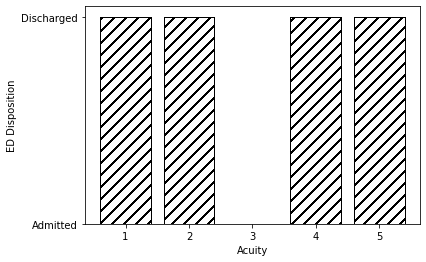

In [27]:
#77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & 
#make the hatchs onto the bar by using set_hatch() method.

edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
#fig = plt.figure(figsize = (10, 5))
df_new = edvisit[["Acuity","EDDisposition"]]

#dropping duplicates
df_new.drop_duplicates()

#plotting the graph
y=edvisit["EDDisposition"]
x=edvisit["Acuity"]
bars = plt.bar(x,y, edgecolor='black')

#set_hatch method
hatches = ['//' if x>0 else '' for x in x]
for i in range(len(bars)):
   bars[i].set(hatch = hatches[i], fill=False)
                
#adding labels to the graph
plt.xlabel("Acuity")
plt.ylabel("ED Disposition")
plt.show()


In [15]:
#78.Find reasonForVisit with highest count of acuity 5 patients.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_edcount = edvisit.groupby("ReasonForVisit")["Acuity"].apply(lambda x: (x==5).sum()).nlargest(1).reset_index(name='Patientcount')
display(df_edcount)

,ReasonForVisit,Patientcount
0,Chest Pain,61


In [28]:
#79.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","ExpectedLOS"]]
df_diff= df_readm.groupby("PrimaryDiagnosis")["ExpectedLOS"].apply(lambda x: x.max() - x.min()).nlargest(1).reset_index(name='Difference in LOS')
display(df_diff)                                                      

,PrimaryDiagnosis,Difference in LOS
0,Pneumonia,14.83426


In [29]:
#80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).
provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df_pr = provider[["ProviderSpecialty"]]
prspeciality = df_pr.groupby(["ProviderSpecialty"]).sum()
display(prspeciality)

""
ProviderSpecialty
Cardiology
Pediatrics
PrimaryCare
Surgery
